This problem was adapted from Professor Farimani's paper. If you are interested in learning more, you can read it <a href="https://www.nature.com/articles/s41699-018-0060-8.pdf">here</a>.

In [1]:
# (a)
# data preprocessing
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('data.csv')
data.head()

,Unnamed: 0,TRP,Unnamed: 2,ALA,Unnamed: 4,TYR,Unnamed: 6,PRO,Unnamed: 8,HIS,...,Unnamed: 30,VAL,Unnamed: 32,ASN,Unnamed: 34,GLN,Unnamed: 36,ARG,Unnamed: 38,LYS
0,1.46,2600,270.6,75.8,-1.23,1800,17.7,170.0,117.6,1090,...,7.4623,400.13,90.166,1114.1,65.565,1509.9,82.483,1427.5,71.236,1459.6
1,21.60,2500,288.4,52.1,11.30,1700,21.3,91.0,105.8,1040,...,10.8040,437.57,94.842,1148.6,59.352,1479.9,77.121,1405.5,66.883,1451.1
2,12.60,3200,284.8,72.5,14.60,1800,21.1,74.0,113.0,1070,...,12.7810,472.14,99.965,1103.7,67.071,1471.7,87.291,1418.1,71.413,1452.2
3,6.31,2600,284.5,70.7,6.59,1800,23.8,130.0,117.2,1040,...,17.9320,414.47,96.657,1061.5,62.765,1495.0,88.109,1428.4,73.894,1434.1
4,-3.39,3300,283.5,41.7,4.60,1900,15.7,72.0,111.1,1030,...,14.0700,466.45,95.404,1144.1,60.378,1475.5,77.720,1443.6,72.228,1458.2


In [2]:
new_data=pd.DataFrame()
headers= data.columns.values
for i in range(data.shape[1]//2):
    a=np.array(data.iloc[:,2*i])
    b=np.array(data.iloc[:,2*i+1])
    c=np.array([headers[2*i+1]]*data.shape[0])
    temp_df = pd.DataFrame()
    temp_df['x1'] = a
    temp_df['x2'] = b
    temp_df['label'] = c
    new_data = pd.concat([new_data,temp_df])

In [3]:
new_data.reset_index(drop=True,inplace=True)

In [4]:
new_data.head()

,x1,x2,label
0,1.46,2600.0,TRP
1,21.60,2500.0,TRP
2,12.60,3200.0,TRP
3,6.31,2600.0,TRP
4,-3.39,3300.0,TRP


In [5]:
new_labels=[0]
j=0
for i in range(1,len(new_data)):
    if new_data['label'][i]!=new_data['label'][i-1]:
        j+=1
    new_labels.append(j)
new_data['One_hot_labels']=new_labels

In [6]:
from sklearn.model_selection import train_test_split
# get the locations
X = new_data.iloc[:, :-2]
y = new_data.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
print(X_train.shape)

(1400, 2)


In [8]:
# sns.scatterplot(data=X_train,palette='viridis')

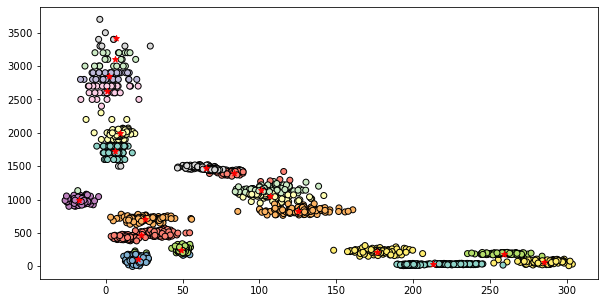

In [9]:
# (b)
# k-means
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import numpy as np

for i in range(10):
    kmeans = KMeans(n_clusters=20,init="k-means++").fit(X_train)
k=kmeans.predict(X)
centroids = kmeans.cluster_centers_

u_labels = list(np.unique(y))
plot_labels=[]
for i in y:
    plot_labels.append(u_labels.index(i))
plt.figure(figsize=(10,5))
plt.scatter(X['x1'] , X['x2'] ,c=k,cmap="Set3",edgecolor='black')
plt.scatter(centroids[:,0] , centroids[:,1] , color = 'r',marker='*')
plt.show()

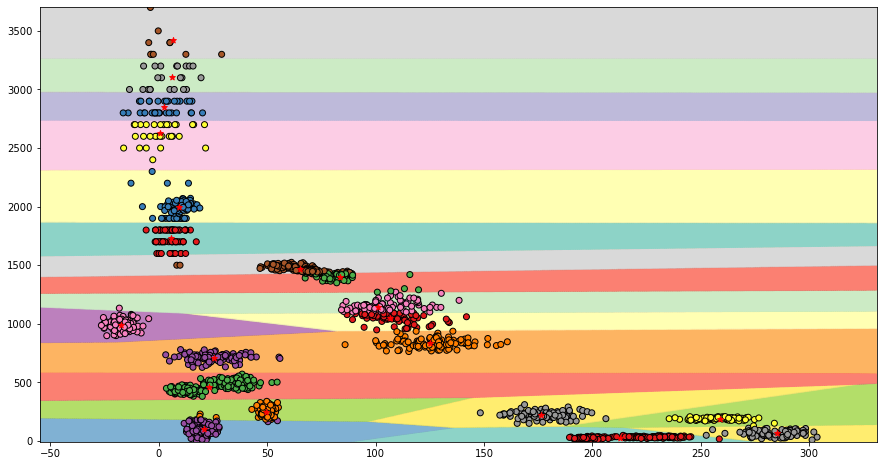

<Figure size 432x288 with 0 Axes>

In [10]:
h=1
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_train['x1'].min() - 1, X_train['x1'].max() + 1
y_min, y_max = X_train['x2'].min() - 1, X_train['x2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
extra_margin = 1
sampling_interval = 1

x_axis = np.arange(x_min-(np.abs(x_min)*extra_margin), x_max+(np.abs(x_min)*extra_margin), sampling_interval)
y_axis = np.arange(y_min-(np.abs(y_min)*extra_margin), y_max+(np.abs(y_min)*extra_margin), sampling_interval)
x_mesh, y_mesh = np.meshgrid(x_axis, y_axis)

x_mesh_flatten = x_mesh.flatten()
y_mesh_flatten = y_mesh.flatten()

x_mesh_flatten_reshape = x_mesh_flatten.reshape((x_mesh_flatten.shape[0],1))
y_mesh_flatten_reshape = y_mesh_flatten.reshape((y_mesh_flatten.shape[0],1))

X_grid = np.hstack((x_mesh_flatten_reshape,y_mesh_flatten_reshape))


labels_grid = kmeans.predict(X_grid)

labels_mesh = labels_grid.reshape(x_mesh.shape)

plt.figure(figsize=(15,8), facecolor="white")
plt.pcolormesh(x_mesh, y_mesh, labels_mesh, cmap="Set3", alpha=0.1, shading="gouraud", zorder=0)
plt.scatter(X['x1'] , X['x2'] ,c=k,cmap="Set1",edgecolor='black')
plt.scatter(centroids[:,0] , centroids[:,1] , color = 'r',marker='*')
plt.show()
plt.tight_layout()

### Train the training dataset with random forest, leaving the number of estimators as default. In the first figure, plot decision boundary and data . Report accuracy. In the second figure, plot the accuracy on testing set in percentage against the number of estimators which is in range [1, 25]

In [11]:
# (c)
# random forest
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
# le.transform(y_train)
clf = RandomForestClassifier()
model=clf.fit(X_train, y_train)

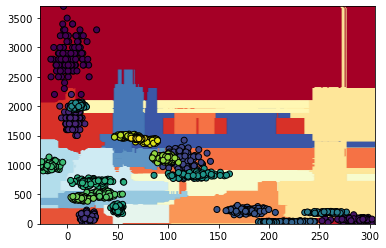

In [12]:
# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
cmap = plt.cm.RdYlBu

x_min, x_max = X['x1'].min() - 1, X['x1'].max() + 1
y_min, y_max = X['x2'].min() - 1, X['x2'].max() + 1
xx, yy = np.meshgrid(
np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1)
)


Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=cmap)


xx_coarser, yy_coarser = np.meshgrid(
    np.arange(x_min, x_max, 1),
    np.arange(y_min, y_max, 1),
)
Z_points_coarser = clf.predict(
    np.c_[xx_coarser.ravel(), yy_coarser.ravel()]
).reshape(xx_coarser.shape)
cs_points = plt.scatter(
    xx_coarser,
    yy_coarser,
    s=15,
    c=Z_points_coarser,
    cmap=cmap,
    edgecolors="none",
)

plt.scatter(X['x1'] , X['x2'],c=y,edgecolor='black')
plt.show()

In [13]:
pred=clf.predict(X_test)
Y_test=np.array(y_test)
miss=0
for i in range(len(pred)):
    if pred[i]!=Y_test[i]:
        miss+=1
acc=(len(y_test)-miss)/len(y_test)
print(f'Accuracy = {acc*100}')

Accuracy = 97.16666666666667


Accuracy with 1 estimators = 95.16666666666667
Accuracy with 2 estimators = 93.83333333333333
Accuracy with 3 estimators = 96.16666666666667
Accuracy with 4 estimators = 95.83333333333334
Accuracy with 5 estimators = 97.5
Accuracy with 6 estimators = 96.16666666666667
Accuracy with 7 estimators = 96.83333333333334
Accuracy with 8 estimators = 96.33333333333334
Accuracy with 9 estimators = 97.16666666666667
Accuracy with 10 estimators = 96.5
Accuracy with 11 estimators = 97.16666666666667
Accuracy with 12 estimators = 97.5
Accuracy with 13 estimators = 96.66666666666667
Accuracy with 14 estimators = 96.83333333333334
Accuracy with 15 estimators = 97.5
Accuracy with 16 estimators = 97.16666666666667
Accuracy with 17 estimators = 96.83333333333334
Accuracy with 18 estimators = 97.0
Accuracy with 19 estimators = 97.16666666666667
Accuracy with 20 estimators = 97.0
Accuracy with 21 estimators = 96.83333333333334
Accuracy with 22 estimators = 96.83333333333334
Accuracy with 23 estimators = 9

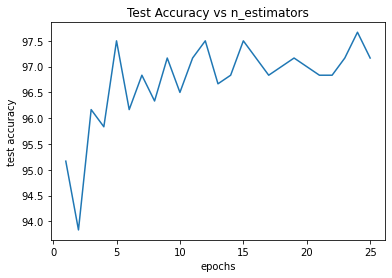

In [14]:
num_est=np.arange(1,26)
acc_per_epoch=[]
epoch=[]
for j in num_est:
    miss = 0
    clf = RandomForestClassifier(n_estimators=j)
    model = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    for i in range(len(pred)):
        if pred[i]!=Y_test[i]:
            miss+=1
    acc=(len(Y_test)-miss)/len(Y_test)
    acc_per_epoch.append(acc*100)
    epoch.append(j)
    print(f'Accuracy with {j} estimators = {acc*100}')
plt.plot(epoch,acc_per_epoch)
plt.title('Test Accuracy vs n_estimators')
plt.xlabel('epochs')
plt.ylabel('test accuracy');

# (d)
# Analysis


Here we can see that the decision boundary in the kmeans is not necessarily parallel to the axis. While the random forest has the decision boundaries parallel to the axis. 

The kmeans is not that great in classifying the points of if the two different labels are nearby, we can see this in the bottom right corner of the picture. The Random Forest on the other hand is able to classify those points. 

The performance tends to increase with the increase in number of n_estimators, though this is not a strict increase but it the trend seems to increase with the increase in n_estimators. 
